In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes for randomization
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#generate empty lat/long and cities list 
lats_longs_list = []
cities = []

In [3]:
#randomize latitude and longitudes
latitudes = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
longitudes = np.random.uniform(lng_range[0], lng_range[1], size = 1500)

#zip the lat and longs as paired tuples/coordinates
lats_longs_list = zip(latitudes,longitudes)

In [4]:
# Identify nearest city for each latitude, longitude zip/combination using citipy, as well as country
for i in lats_longs_list:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

614


In [5]:
#perform API calls to check the weather of each city in our list

#empty list to populate, pass to df, and plot
city_list = []
temps = []
humidity = []
clouds = []
winds = []
lats = []
longs = []
countries = []
date = []

#set url via f-strings literal
units = 'imperial'
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q='

In [6]:
#check weather api documentation for needed query keywords

In [7]:
# iterate through cities list to populate the empty df lists above by API requests

#set loop counters
counter = 0
set_counter = 1

for i in cities:
    try:
        response = requests.get(base_url + i.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
        date.append(response['dt'])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(i)
        else:
            counter += 1
            city_list.append(i)
        print(f"Processing Record # : {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("------------------------------\nData API Response Complete\n------------------------------")

Processing Record # : 1 of Set 1 | zaraza
Processing Record # : 2 of Set 1 | beloha
Processing Record # : 3 of Set 1 | mayumba
Processing Record # : 4 of Set 1 | atuona
City not found. Skipping request...
Processing Record # : 5 of Set 1 | punta arenas
Processing Record # : 6 of Set 1 | mys shmidta
Processing Record # : 7 of Set 1 | murighiol
Processing Record # : 8 of Set 1 | puerto ayora
Processing Record # : 9 of Set 1 | kavaratti
Processing Record # : 10 of Set 1 | ushuaia
Processing Record # : 11 of Set 1 | busselton
Processing Record # : 12 of Set 1 | nizhniy kuranakh
Processing Record # : 13 of Set 1 | lorengau
Processing Record # : 14 of Set 1 | mataura
Processing Record # : 15 of Set 1 | mackay
Processing Record # : 16 of Set 1 | cherskiy
City not found. Skipping request...
Processing Record # : 17 of Set 1 | hermanus
Processing Record # : 18 of Set 1 | praia da vitoria
Processing Record # : 19 of Set 1 | sabang
Processing Record # : 20 of Set 1 | kirovskiy
Processing Record #

Processing Record # : 20 of Set 4 | jumla
Processing Record # : 21 of Set 4 | pemangkat
City not found. Skipping request...
Processing Record # : 22 of Set 4 | tezu
Processing Record # : 23 of Set 4 | suez
Processing Record # : 24 of Set 4 | klaksvik
City not found. Skipping request...
Processing Record # : 25 of Set 4 | conakry
Processing Record # : 26 of Set 4 | teya
City not found. Skipping request...
Processing Record # : 27 of Set 4 | flinders
Processing Record # : 28 of Set 4 | tasiilaq
City not found. Skipping request...
Processing Record # : 29 of Set 4 | chapais
Processing Record # : 30 of Set 4 | chernyshevskiy
Processing Record # : 31 of Set 4 | keti bandar
Processing Record # : 32 of Set 4 | karasuk
Processing Record # : 33 of Set 4 | namatanai
Processing Record # : 34 of Set 4 | deputatskiy
Processing Record # : 35 of Set 4 | burnie
Processing Record # : 36 of Set 4 | lyngseidet
Processing Record # : 37 of Set 4 | vila
Processing Record # : 38 of Set 4 | tongren
Processing

Processing Record # : 43 of Set 7 | tuatapere
Processing Record # : 44 of Set 7 | provideniya
Processing Record # : 45 of Set 7 | vrangel
Processing Record # : 46 of Set 7 | sisimiut
Processing Record # : 47 of Set 7 | felanitx
City not found. Skipping request...
Processing Record # : 48 of Set 7 | krasnoselkup
Processing Record # : 49 of Set 7 | fenoarivo
Processing Record # : 1 of Set 8 | grand river south east
Processing Record # : 2 of Set 8 | marsa matruh
Processing Record # : 3 of Set 8 | certesti
Processing Record # : 4 of Set 8 | montepuez
Processing Record # : 5 of Set 8 | sayyan
Processing Record # : 6 of Set 8 | noumea
Processing Record # : 7 of Set 8 | nishihara
Processing Record # : 8 of Set 8 | mersing
Processing Record # : 9 of Set 8 | uri
Processing Record # : 10 of Set 8 | vicuna
Processing Record # : 11 of Set 8 | odweyne
Processing Record # : 12 of Set 8 | xuddur
Processing Record # : 13 of Set 8 | damietta
Processing Record # : 14 of Set 8 | sorsk
Processing Record 

Processing Record # : 13 of Set 11 | marawi
City not found. Skipping request...
Processing Record # : 14 of Set 11 | kununurra
City not found. Skipping request...
Processing Record # : 15 of Set 11 | voi
Processing Record # : 16 of Set 11 | hue
Processing Record # : 17 of Set 11 | port moresby
Processing Record # : 18 of Set 11 | pergamino
City not found. Skipping request...
Processing Record # : 19 of Set 11 | viedma
Processing Record # : 20 of Set 11 | santa isabel do rio negro
Processing Record # : 21 of Set 11 | nuevitas
Processing Record # : 22 of Set 11 | ladario
City not found. Skipping request...
Processing Record # : 23 of Set 11 | kendari
Processing Record # : 24 of Set 11 | cidreira
Processing Record # : 25 of Set 11 | mora
City not found. Skipping request...
Processing Record # : 26 of Set 11 | simbahan
Processing Record # : 27 of Set 11 | touros
Processing Record # : 28 of Set 11 | nicolas bravo
City not found. Skipping request...
Processing Record # : 29 of Set 11 | surse

In [8]:
#convert to raw df
weatherpy_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temps,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":winds,
    "Country":countries,
    "Date":date,   
}

In [43]:
weatherpy_df = pd.DataFrame(weatherpy_dict)

#export to csv
weatherpy_df.to_csv('cities.csv',encoding = 'utf-8',index = False)

weatherpy_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [10]:
weatherpy_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zaraza,9.35,-65.32,74.95,95,100,3.44,VE,1597785387
1,beloha,-25.17,45.05,68.85,60,10,8.39,MG,1597785387
2,mayumba,-3.43,10.66,73.47,90,100,10.69,GA,1597785323
3,atuona,-9.80,-139.03,79.16,74,2,21.23,PF,1597784921
4,punta arenas,8.99,125.34,76.59,85,100,4.29,PH,1597785388
5,mys shmidta,62.06,48.62,47.37,89,100,10.33,RU,1597785388
6,murighiol,45.03,29.17,68.00,77,36,3.36,RO,1597785388
7,puerto ayora,36.59,-6.23,80.01,78,0,10.29,ES,1597785388
8,kavaratti,10.57,72.64,81.64,80,100,11.18,IN,1597785388
9,ushuaia,-54.80,-68.30,33.80,90,90,26.40,AR,1597785379


In [12]:
#check if any city has higher than 100% humidity
weatherpy_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,22.524322,25.488718,68.041062,71.895604,50.457875,7.668883,1.597785e+09
std,32.619529,88.495173,14.610427,20.876704,39.333006,5.646290,1.626536e+02
min,-54.800000,-179.170000,33.800000,1.000000,0.000000,0.450000,1.597785e+09
25%,-3.792500,-49.532500,56.185000,62.000000,5.000000,3.702500,1.597785e+09
50%,27.695000,25.165000,69.765000,77.000000,48.500000,6.450000,1.597785e+09
75%,50.755000,102.912500,78.800000,88.000000,90.000000,10.290000,1.597785e+09
max,78.220000,179.320000,107.080000,100.000000,100.000000,43.550000,1.597785e+09


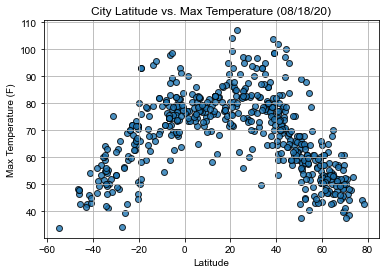

In [13]:
#temp vs latitude scatterplot, format time

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")


### The above scatterplot is analyzing temperature values as we move closer and further away from the equator. We can see that temps rise as we near 0˚ latitude (equatorial location)

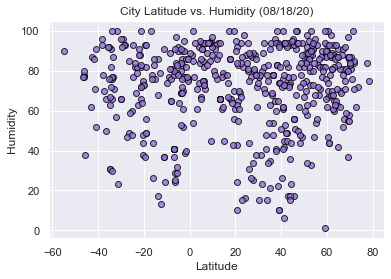

In [14]:
#humidity vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = "mediumpurple")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Humidity.png")

### ### The above scatterplot is analyzing humidity values as we move closer and further away from the equator. It looks like humidity levels are not clearly different near 0˚ latitude (equatorial location).

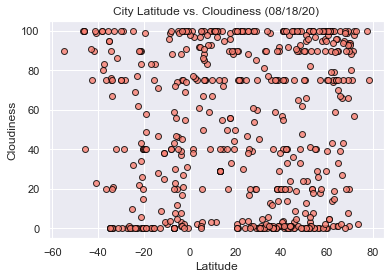

In [15]:
#cloudiness vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'salmon')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Cloudiness.png")

### The scatterplot above does not appear to show a definitive relationship between cloud cover and geolocation.

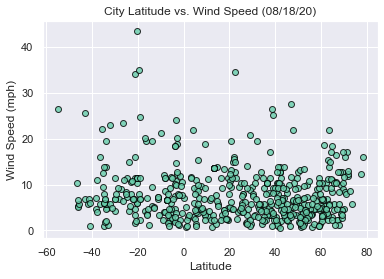

In [16]:
#wind speed vs latitude

plt.scatter(weatherpy_df["Lat"], 
            weatherpy_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities",color = 'mediumaquamarine')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("Latitude vs Wind Speed.png")

### Another scatterplot of wind speeds and geolocation comparisons. Again, the data seems like there is no clear pattern for wind speed measured at distances from the equator.

In [29]:
#linear regression by hemisphere

#create northern and southern df
north_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat']>0)]
south_hemi_df = weatherpy_df.loc[(weatherpy_df['Lat'] < 0)]

In [30]:
north_hemi_df.count()

City          385
Lat           385
Lng           385
Max Temp      385
Humidity      385
Cloudiness    385
Wind Speed    385
Country       385
Date          385
dtype: int64

In [31]:
south_hemi_df.count()

City          161
Lat           161
Lng           161
Max Temp      161
Humidity      161
Cloudiness    161
Wind Speed    161
Country       161
Date          161
dtype: int64

In [33]:
#define the function to call for each analysis/parameter
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

r-squared: -0.7101295927557103


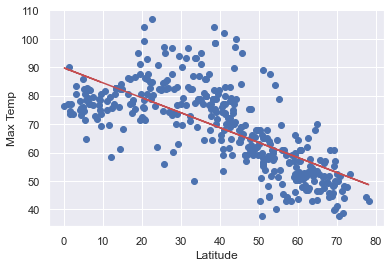

<Figure size 432x288 with 0 Axes>

In [34]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("NH_temp_vs_lat.png")

r-squared: 0.7724494929453456


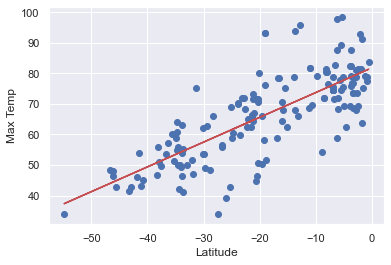

<Figure size 432x288 with 0 Axes>

In [35]:
#Southern Hemisphere - Temperature (F) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("SH_temp_vs_lat.png")

### Looking at the linear regression for each hemisphere, the Northern hemisphere displays a strong negative relationship between temps and distance from the equator (temps decrease the further from the equator a city lies), while the southern hemisphere displays a strong positive relationship (temps increase the closer to the equator a city lies).

r-squared: 0.00928767336501449


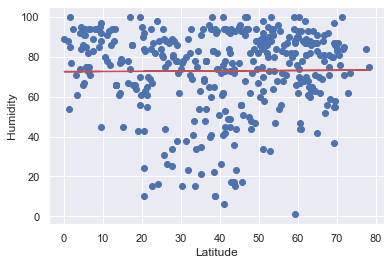

<Figure size 432x288 with 0 Axes>

In [36]:
#Northern Hemisphere - Humidity (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("NH_hum_vs_lat.png")

r-squared: -0.12261719026865396


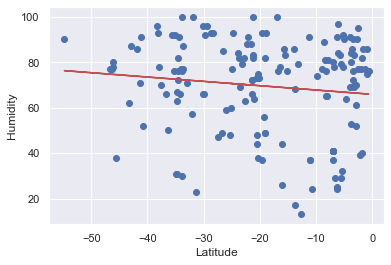

<Figure size 432x288 with 0 Axes>

In [37]:
#Southern Hemisphere - Humidity (%) vs. Latitude 
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("SH_hum_vs_lat.png")

### Neither hemisphere display a strong correlations between humidity levels and equatorial geolocation. Scores indicate the variability cannot be predicted by the line of best fit.

r-squared: -0.004653822547820089


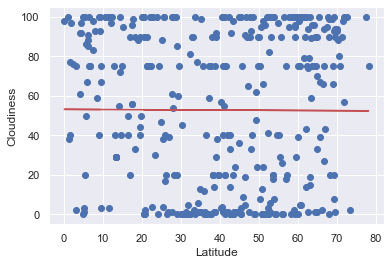

<Figure size 432x288 with 0 Axes>

In [38]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude 
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("NH_cloud_vs_lat.png")

r-squared: -0.18834243248948682


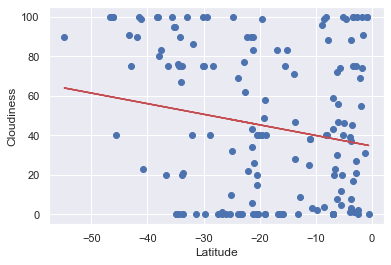

<Figure size 432x288 with 0 Axes>

In [39]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("SH_cloud_vs_lat.png")

### Neither hemisphere display a strong correlations between cloud cover levels and equatorial geolocation. Scores indicate the variability cannot be predicted by the line of best fit.

r-squared: 0.014729523719825709


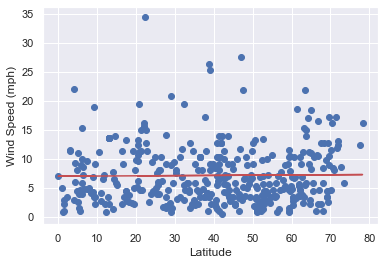

<Figure size 432x288 with 0 Axes>

In [40]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("NH_wind_vs_lat.png")

r-squared: -0.06608585222563891


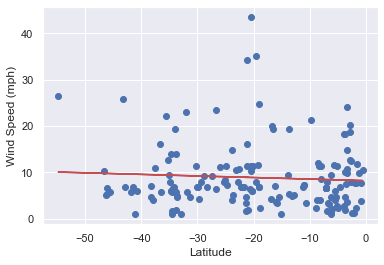

<Figure size 432x288 with 0 Axes>

In [41]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("SH_wind_vs_lat.png")

### Neither hemisphere display a strong correlations between wind speeds and equatorial geolocation. Scores indicate the variability cannot be predicted by the line of best fit.